## Recap from last class:

 * Learned basics of manipulating numeric arrays: math operations, `shape`, `reshape()`
 * Learned how to calculate basic statistics on arrays: `average()`, `std()`, `var()`
 * Learn how to generate contour plots: `PP.pcolormesh(x,y,data,...)`
 * Continued learning how to manipulate date/time information: `netCDF4.num2date()` and `netCDF4.date2num()`
 * Learn how to read netCDF output: `fin = netCDF4.Dataset(nc_filename)`

## Objectives:

 * Learn how to locate specific data values in numpy arrays
 * Know how to calculate basic statistics on arrays: average, standard deviation, variance
 * Learn how to add graphical elements to plots and customize plot fonts
 * Continue learning how to manipulate date/time information
 * Continue learning how to read netCDF output
 * Continue learning how to read complex CSV data


This notebook focuses on demonstrating capabilities in numpy that can be used to efficiently search within arrays.  This can be particularly useful for extracting subsets of data (i.e., data from a particular physical location or time).

We'll start with a common problem: extracting a time series of data from a specific point within a lat/lon field.  We'll expand on the dataset used in [Week 3](http://taobrienucd.bitbucket.org/Week%203%20--%20Multidimensional%20arrays.html).

In [4]:

""" load temperature data from a reanalysis file and set up the notebook"""
%matplotlib inline
import netCDF4 as nc # load the netCDF library
import pylab as PP # load the plotting library
import matplotlib as mpl # import matplotlib
import datetime as dt # import the datetime libarary for date handling
from numpy import * # load numpy

#Set the default font for plots
font = { 'family' : 'sans-serif', \
         'size' : '15', \
         'weight' : 'bold'}
mpl.rc('font', **font)

# set the reanalysis file na
infile = '../data/air.sfc.mon.mean.nc'

# open the netCDF file and read the temperature data
fin = nc.Dataset(infile,'r')

# get a list of variable names in the file
var_list = list(fin.variables)


# print the list and some attributes of these variables
for varname in var_list:
    try:
        var_description = fin.variables[varname].long_name # netCDF files typically have a 'long_name' property for all variables
    except:
        var_description = ''
    
    try:
        var_units = fin.variables[varname].units # they typically also provide units
    except:
        var_units = ''
        
    print("Variable name: '{}',\tunits: '{}',\tdescription: '{}'".format(varname,var_units,var_description))

Variable name: 'lat',	units: 'degrees_north',	description: 'Latitude'
Variable name: 'lon',	units: 'degrees_east',	description: 'Longitude'
Variable name: 'time_bnds',	units: '',	description: 'Time Boundaries'
Variable name: 'time',	units: 'hours since 1800-1-1 00:00:0.0',	description: 'Time'
Variable name: 'air',	units: 'Kelvins',	description: 'Monthly Air Temperature at Surface'


In [6]:
# load the temperature variable
temperature_var = fin.variables['air']

# get the temperature array (this notation is specific to netCDF)
temperature = temperature_var[:]

# get the latitude and longitude arrays
lat = fin.variables['lat'][:]
lon = fin.variables['lon'][:]

# print the latitude and longitude arrays
print('lat: ',lat)
print('lon: ',lon)

lat:  [ 88.54199982  86.65309906  84.75319672  82.85079956  80.94730377
  79.04350281  77.13939667  75.23509979  73.33070374  71.42620087
  69.521698    67.61710358  65.71250153  63.80789948  61.90330124
  59.99860001  58.09389877  56.18930054  54.2845993   52.37990189
  50.47520065  48.57049942  46.66579819  44.76110077  42.85639954
  40.9516983   39.04700089  37.14220047  35.23749924  33.33280182
  31.42810059  29.52339935  27.61860085  25.71389961  23.80920029
  21.90439987  19.99970055  18.09499931  16.19020081  14.28549957
  12.38080025  10.47603989   8.57131004   6.66657019   4.76183987
   2.85710001   0.95236802  -0.95236802  -2.85710001  -4.76183987
  -6.66657019  -8.57131004 -10.47603989 -12.38080025 -14.28549957
 -16.19020081 -18.09499931 -19.99970055 -21.90439987 -23.80920029
 -25.71389961 -27.61860085 -29.52339935 -31.42810059 -33.33280182
 -35.23749924 -37.14220047 -39.04700089 -40.9516983  -42.85639954
 -44.76110077 -46.66579819 -48.57049942 -50.47520065 -52.37990189
 -54

The printed lat/lon variables describe the *x* (lon) and *y* (lat) coordinates at which the temperature data are given.

We see from printing that the latitudes go in *reverse* order from ~90N (the north Pole) to -90 south.  And we see that longitudes are specified from 0 to 360 degrees.  The other common convention is to report longitudes from -180 to 180.

Let's plot the data to show this.

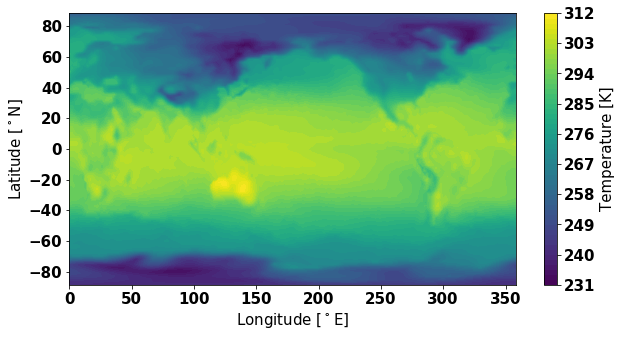

In [7]:
fig,ax = PP.subplots(figsize=(10,5))

# plot a filled contour plot of temperatures with lon/lat as the x/y coordinates
contour_plot = ax.contourf(lon,lat,temperature[-1,:,:],64)

# set axis labels
ax.set_xlabel('Longitude [$^\circ$E]')
ax.set_ylabel('Latitude [$^\circ$N]')

# add a colorbar
fig.colorbar(contour_plot,ax=ax,label='Temperature [K]')

PP.show()

# Extracting data from Davis

The approximate coordinates of Davis, CA are 38.5449° N, 121.7405° W according to Google.  Looking at the longitudes on the plot, we see that the approximate longitude of California is around 240 $^\circ$E; so we need to convert to $^\circ$W by subtracting it from 360$^\circ$.  We can check this by plotting a star on the map at the lat/lon of Davis, CA and checking that it is correct (note that we can clearly see continental outlines in the temperature field, which makes this easy).

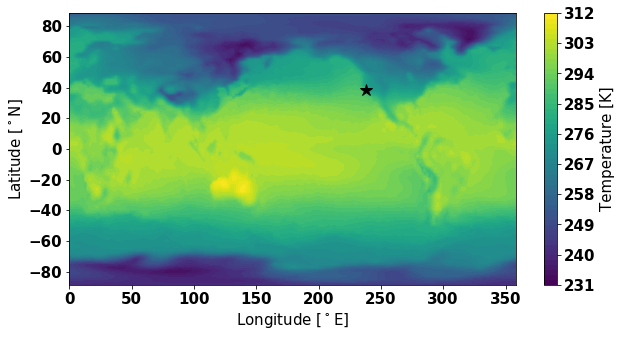

In [8]:
""" set the latitude/longitude of Davis and plot it on the map """
# set the lat/lon of Davis, as reported by google
davis_lat = 38.5449
davis_lon = 121.7405

# convert longitude to degrees_east
davis_lon = 360. - davis_lon

# re-do the above plot and add a star at the location of Davis


fig,ax = PP.subplots(figsize=(10,5))

# plot a filled contour plot of temperatures with lon/lat as the x/y coordinates
contour_plot = ax.contourf(lon,lat,temperature[-1,:,:],64)

# plot a star at the location of Davis
ax.plot(davis_lon,davis_lat,marker='*',markersize=12,color='black')

# set axis labels
ax.set_xlabel('Longitude [$^\circ$E]')
ax.set_ylabel('Latitude [$^\circ$N]')

# add a colorbar
fig.colorbar(contour_plot,ax=ax,label='Temperature [K]')

PP.show()

Now, say we want to extract data from the grid cell closest to Davis, how would we do that?  We could do it manually by:

 1. Looping over the latitude array
 2. Find the difference between each latitude and the Davis latitude
 3. Record the latitude index and the absolute value of the difference in variables
 4. Check if the stored absolute value is smaller than the current one
     a. if so, overwrite the stored values with the new absolute value and the current latitude index
     b. if not, just go on
 5. Repeat this exercise for longitude
 
If successful, this algorithm will find the lat/lon indices for which the difference between the Davis lat/lon and the file's lat/lon is smallest.  In this sense, these indices give the closest values.

Note that I am just describing this for completeness (how would you program this manually?).  I show below the numpy way to achieve what the above algorithm does.

In [9]:
""" Define a function that gets the index within an array that is closest to a given value """

def find_nearest(array,value):
    """Finds the index of the nearest value in an array
    
        input:
        ------
        array : a 1D numpy array
        
        value : the value for which to return the nearest index in `array'
        
        output:
        -------
        
        nearest_index : the index within array for which array is closest to value
    
    """
    # calculate the absolute value of the difference between the array and the value
    # (for all values within array)
    absolute_difference = abs(array-value)

    # use argmin() to find the index that minimizes the absolute value of the difference
    # between the array and the value
    nearest_index = absolute_difference.argmin()
    
    # return the index
    return nearest_index


In [10]:
""" Test the above function on the Davis lat/lons """

# get the latitude index nearest to the Davis latitude
i_lat_davis = find_nearest(lat,davis_lat)

# get the longitude index nearest to the Davis latitude
j_lon_davis = find_nearest(lon, davis_lon)

# Just to check, get the corresponding lat/lons from the file
approx_davis_lat = lat[i_lat_davis]
approx_davis_lon = lon[j_lon_davis]

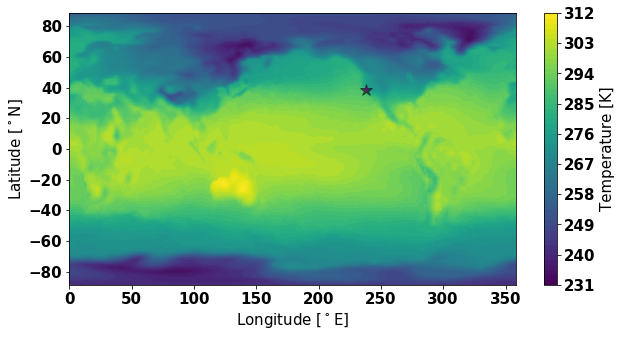

In [11]:
# and plot it to show that it is in fact near Davis

fig,ax = PP.subplots(figsize=(10,5))

# plot a filled contour plot of temperatures with lon/lat as the x/y coordinates
contour_plot = ax.contourf(lon,lat,temperature[-1,:,:],64)

# plot a star at the location of Davis
ax.plot(davis_lon,davis_lat,marker='*',markersize=12,color='black',alpha=0.5)

# plot a purple circle at the approximate location of Davis
ax.plot(approx_davis_lon,approx_davis_lat,marker='o',markersize=4,color='purple',alpha=0.5)


# set axis labels
ax.set_xlabel('Longitude [$^\circ$E]')
ax.set_ylabel('Latitude [$^\circ$N]')

# add a colorbar
fig.colorbar(contour_plot,ax=ax,label='Temperature [K]')

PP.show()

Sure enough, the point plots very near the actual location of Davis on the map.  So now we can use these indices to extract a timeseries of temperature for Davis.

In [12]:
""" extract a timeseries of temperature for Davis, CA """
# extract all temperatures for the lat/lon of Davis
davis_temperature = temperature[:,i_lat_davis,j_lon_davis]

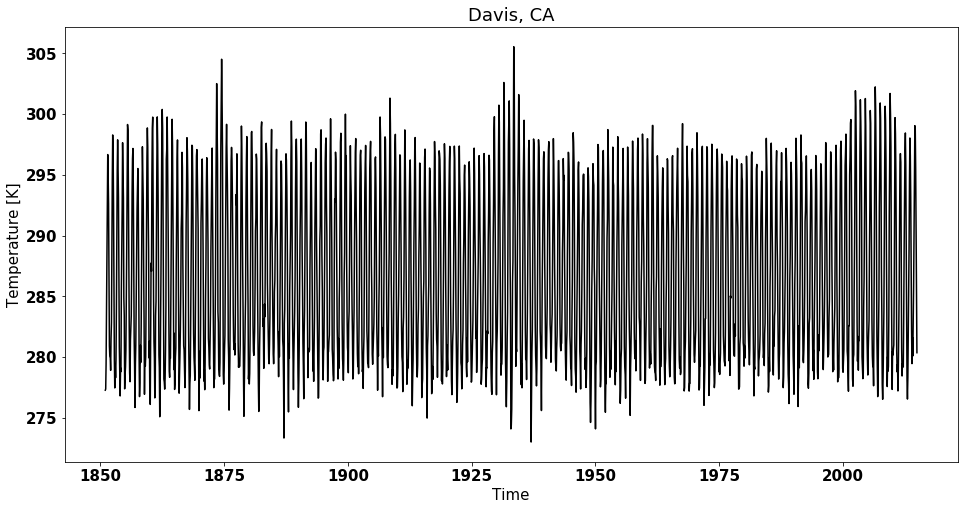

In [13]:
""" plot the timeseries """

# pull time from the file
time_var = fin.variables['time']

# extract the time variable and convert it to fractional years (we've seen this before)
times = time_var[:]

# convert to datetime
dates = nc.num2date(times,time_var.units)

# convert back to numeric units
days_since = nc.date2num(dates,'days since 1850-01-01 00:00:00')
# convert to years
years = days_since/365.25 + 1850


fig,ax = PP.subplots(figsize=(16,8))

ax.plot(years,davis_temperature,'k-')

ax.set_xlabel('Time')
ax.set_ylabel('Temperature [K]')
ax.set_title('Davis, CA')

PP.show()

To test the hypothesis that this dataset represents temperatures in Davis, I have downloaded a the GHCN monthly record from NCDC (ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/ghcnm.tavg.latest.qca.tar.gz) and unzipped it into the `data` subdirectory.  According to the README file at the FTP site, the format of the file is as follows:

```
Variable          Columns      Type
          --------          -------      ----

          ID                 1-11        Integer
          YEAR              12-15        Integer
          ELEMENT           16-19        Character
          VALUE1            20-24        Integer
          DMFLAG1           25-25        Character
          QCFLAG1           26-26        Character
          DSFLAG1           27-27        Character
            .                 .             .
            .                 .             .
            .                 .             .
          VALUE12          108-112       Integer
          DMFLAG12         113-113       Character
          QCFLAG12         114-114       Character
          DSFLAG12         115-115       Character
```

Of particular relevance: we need to find lines that match the station ID of a Davis station (I have found through the inventory file that station ID 42500042294 corresponds to the West Davis experimental station, which has a long record), we need the year, and we need the monthly values from each column.  The QC flags might also be relevant.  The description of the data values and QC flag follow:


```
VALUE: monthly value (MISSING=-9999).  Temperature values are in
                 hundredths of a degree Celsius, but are expressed as whole
                 integers (e.g. divide by 100.0 to get whole degrees Celsius).
...
DMFLAG: data measurement flag, nine possible values:

                  blank = no measurement information applicable
                  a-i = number of days missing in calculation of monthly mean
                        temperature (currently only applies to the 1218 USHCN
                        V2 stations included within GHCNM)                

                  Quality Controlled Adjusted (QCA) QC Flags:

                  A = alternative method of adjustment used.
 
                  M = values with a non-blank quality control flag in the "qcu"
                      dataset are set to missing the adjusted dataset and given
                      an "M" quality control flag.

                  X = pairwise algorithm removed the value because of too many
                      inhomogeneities.
                      
                            DSFLAG: data source flag for monthly value, 21 possibilities:

                  C = Monthly Climatic Data of the World (MCDW) QC completed 
                      but value is not yet published

                  D = Calculated monthly value from daily data contained within the
                      Global Historical Climatology Network Daily (GHCND) dataset.

                  G = GHCNM v2 station, that was not a v2 station that had multiple
                      time series (for the same element).

                  J = Colonial Era Archive Data
 
                  K = received by the UK Met Office

                  M = Final (Published) Monthly Climatic Data of the World 
                     (MCDW)

                  N = Netherlands, KNMI (Royal Netherlans Meteorological 
                      Institute)

                  P = CLIMAT (Data transmitted over the GTS, not yet fully 
                      processed for the MCDW)

                  U = USHCN v2

                  W = World Weather Records (WWR), 9th series 1991 through 2000 

                  Z = Datzilla (Manual/Expert Assessment)

             0 to 9 = For any station originating from GHCNM v2 that had
                      multiple time series for the same element, this flag
                      represents the 12th digit in the ID from GHCNM v2.
                      See section 2.2.2 for additional information.

                  , = CLIMAT (Data transmitted in BUFR format)   
```

Based on this, I'll write the following function to extract a given station's data from the GHCNM file.

In [20]:
def extract_ghcnm_station(stationID,filename='../data/ghcnm.tavg.v3.3.0.20170425.qca.dat',date_units = 'days since 1850-01-01 00:00:00'):
    """Given a station ID, extract a timeseries (and dates) of the all the data for that station
    
        input:
        ------
            stationID : the ID of the desired station
        
            filename  : the path to the GHCNM data file
            
            date_units : the units of the returned dates
            
        output:
        -------
        dates, values : the dates of each data point and the value (in degrees C) of each data point
    
    
    """
    
    # Open and read the file
    with open(filename,'r') as fin:
        file_lines = fin.readlines()
        
    # find lines with the given station ID
    # note that this uses a list comprehension, which is a faster way of doing the following:
    #
    #    station_lines = []
    #    for line in file_lines:
    #        # check if the station ID for the current entry matches the desired station ID
    #        if line[:11] == str(stationID):
    #            # if so, append this line (and strip the newline character)
    #            station_lines.append(line.rstrip())
    station_lines = [ line.rstrip() for line in file_lines if line[:11] == str(stationID) ]
    
    #*****************
    # parse each line
    #*****************
    # inialize the date array
    dates = zeros([len(station_lines),12])
    # initalize the data values array (one row for each of the lines and 12 columns for each of the months)
    values = ma.zeros([len(station_lines),12])
    
    # loop over the lines
    for i in range(len(station_lines)):
        # get the current line
        line = station_lines[i]
        
        # extract the year
        year = int(line[11:15])
        
        # set the starting character for the month1 temperature
        start_char = 19
        for j in range(12):
            # extract the 4 lines corresponding to the current month's data
            current_value = float(line[start_char:start_char+5])
            
            # if the value isn't missing, store it
            if current_value != -9999:
                values[i,j] = current_value
            else:
                # otherwise store a mask value
                values[i,j] = ma.masked
                
            # set the current date
            month = j+1
            current_date = dt.datetime(year,month,1)
            
            # save a numerical version of the current date
            dates[i,j] = nc.date2num(current_date,date_units)
            
            # advance the starting character index (following the dataset documentation) to the next value
            start_char = start_char + 8
            
    # convert the values to celsius
    values /= 100.
    
    # use unravel to convert the arrays to vectors
    values = values.ravel()
    dates = dates.ravel()
            
    # return
    return dates, values

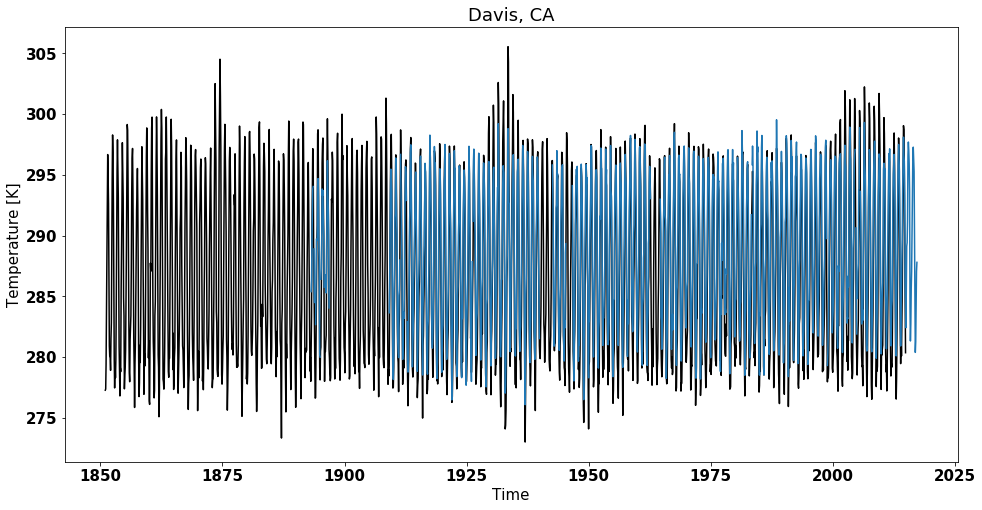

In [21]:
# read the data
time_units = 'days since 1850-01-01 00:00:00'
station_dates,station_values = extract_ghcnm_station(42500042294,date_units=time_units)

# plot it along with the reanalysis data
fig,ax = PP.subplots(figsize=(16,8))

ax.plot(years,davis_temperature,'k-')

station_years = station_dates/365.25 + 1850
ax.plot(station_years,station_values+273.15)

ax.set_xlabel('Time')
ax.set_ylabel('Temperature [K]')
ax.set_title('Davis, CA')

PP.show()

Now the final task is generating a correlation plot, which requires matching data between the two datasets.

Note that we did almost the exact same task for the Tahoe data.  I simply adapted the routine for this purpose and made it more generic so it can be reused.

In [22]:
def pair_data_monthly(   times1, \
                         dataset1, \
                         time1_units, \
                         times2, \
                         dataset2, \
                         time2_units):
    """ Pairs Tahoe (USGS) and NCDC data by time.  Assumes the two datasets represent monthly values.
    
        input:
        ------
        
        times1 :  a numpy array of dates from dataset1 (in units like 'days since 1900-01-01 00:00:00')
        
        dataset1 : a numpy array of data from dataset1
        
        time1_units : the units of times1
        
        times2 : a numpy array of dates from dataset1  (in units like 'days since 1900-01-01 00:00:00')
        
        dataset2 : a numpy array of data from dataset2
        
        time2_units : the units of time2
        
        output:
        ------
        
        dates, dataset1_subset, dataset2_subset 
        (all are numpy arrays)
        
        dates : the date corresponding to each data pair (in time1_units)
        
        dataset1_subset : the dataset1 data at each date
        
        dataset2_subset : the dataset2 data at each date
    
    """
    
    dates_out = []
    
    dataset1_subset = []
    
    dataset2_subset = []
    
    # set the first index in times2 to use
    first_j = 0
    
    # loop over the dataset1 times
    for i in range(len(times1)):
        # loop over the dataset2 times
        for j in range(first_j,len(times2)):
            # convert the times to dates
            date1 = nc.num2date(times1[i],time1_units)
            date2 = nc.num2date(times2[j],time2_units)
            
            # check if the years and months at indices i and j match
            if date1.year == date2.year and date1.month == date2.month:
                # if they do, append the current date
                dates_out.append(times1[i])
                # append the current dataset1 data at index i
                dataset1_subset.append(dataset1[i])
                # append the current dataset2 data at index j
                dataset2_subset.append(dataset2[j])
                
                # set the starting index for the next j loop
                first_j = j+1 
                
                # and break out of this loop since we already have a match
                break
                
    # convert to numpy arrays
    dates_out = array(dates_out)
    dataset1_subset = array(dataset1_subset)
    dataset2_subset = array(dataset2_subset)
    
    return dates_out, dataset1_subset, dataset2_subset

In [23]:
# pair the data
paired_dates,model_values,station_values = pair_data_monthly(years,davis_temperature,time_units, \
                                                             station_years,station_values,time_units)

/home/taobrien/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


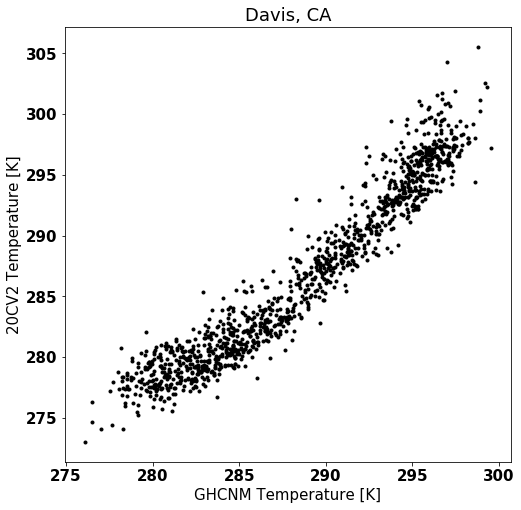

In [24]:
# generate a correlation plot
fig,ax = PP.subplots(figsize=(8,8))

ax.plot(station_values+273.15,model_values,'k.')

ax.set_xlabel('GHCNM Temperature [K]')
ax.set_ylabel('20CV2 Temperature [K]')
ax.set_title('Davis, CA')

PP.show()

Well hey now!

Note that Hector came up with a great, alternate method for pairing the data.  Since this method relies on numpy routines rather than brute-force for-loops, it is much faster:

```python
#def pair_data_monthly(   times1, dataset1, time1_units, times2, dataset2, time2_units):
def pair_data_monthly(   times1, dataset1, times2, dataset2):
    
    """ Pairs Tahoe (USGS) and NCDC data by time.  Assumes the two datasets represent monthly values.
    
        input:
        ------
        
        times1 :  a numpy array of dates for dataset1 (it might be numbers or datetime objects)
        
        dataset1 : a numpy array of data from dataset1
        
        time1_units : the units of times1
        
        times2 : a numpy array of dates for dataset2 (it might be numbers or datetime objects)
        
        dataset2 : a numpy array of data from dataset2
        
        time2_units : the units of time2
        
        output:
        ------
        
        times_out, dataset1_subset, dataset2_subset 
        (all are numpy arrays)
        
        times_out : times corresponding to each data pair (in time1_units)
        
        dataset1_subset : the dataset1 data at each date
        
        dataset2_subset : the dataset2 data at each date
    
    """
    

    if len(dataset1)>len(dataset2):
        indices1=in1d(times1,times2)
        dum=times1[indices1]
        indices2=in1d(times2,dum)
        times_out=times2[indices2]
        dataset1_subset=dataset1[indices1]
        dataset1_subset=dataset1_subset[indices2]
        dataset2_subset=dataset2[indices2]
    else:
        indices1=in1d(timest2,times1)
        dum=times1[indices1]
        indices2=in1d(times1,dum)
        times_out=times1[indices2]
        dataset2_subset=dataset2[indices1]
        dataset2_subset=dataset2_subset[indices2]
        dataset1_subset=dataset1[indices2]
        
    return times_out, dataset1_subset, dataset2_subset


#pair the data
times,data1,data2=pair_data_monthly(davis_temperature,days_since,station_dates,station_values)
```